# Pseudopolioptymalizacja hamulca ciernego, wielopłytkowego
Zadaniem była optymalizacja hamulca wielopłytkowego pod względem czasu hamowania i objętości części roboczej hamulca. Naszymi zmiennymi są średnica płytki ciernej zewnętrzna i wewnętrzna, oraz liczba płytek ciernych.
Ograniczemi są nastomiast maksymalne naciski, maksymalne prędkości poślizgu oraz iloczyn tych wartości. Warto również dodać ograniczenia fizyczne, potrzebne do wykonania na przykład minimalna wartość wewjnętrznej średnicy hamulca.
## Ograniczenia
### ilość płytek
ilość płytek można łątwo ograniczyć patrząc na wzór maksymalnej objętości, jest to wzór na objętość cylindra, wzór na liczbę płytek jestśmy w stanie dość prosto wyprowadzić znając powierzchnię podstawy cylindra, gdyż wysokośc jest zależna tylko od liczby płytek.
$$
H_cyl = k_C g_p + 2k_r \delta
$$
W ramach zadania nie została sprecyzowana odległość między płytkami w stanie luźmy, założone zostało 0.05mm
### naciski maksymalne
Następnym ograniczenie były naciski maksymalne, czyli z grubsza siła nakłądana przez sprężynę na powierzchnię czynn|ą hamulca, wyznaczone wzorem:
$$
p_{max}=\frac{4 f_{spr}}{\pi (D_2-D_1} \leqq 1Mpa
$$
### Maksymalna średnia prędkośc poślizgu
Jest to maksymalna prędkość średnia względnie poruszających się między sobą płytek.
Definiowana jest:
$$
średnie(\frac{\delta \varphi}{\delta t})D_{śr}= \frac{\Delta \varphi}{t_{z}}D_{śr}
$$
Korzystając z zależności:
$$
I_z \frac{\delta^2 \varphi}{\delta t^2}=-M_h
$$
Całkując po czasie t otrzymujemy
$$
v=\frac{\delta \varphi}{\delta t}=\frac{-M_h t_z}{I_z}+c =
$$

In [12]:
from scipy.optimize import minimize
import numpy as np

# indywidualne
I_z = 0.001
n = 1200
t_h_max = 0.3
D_max = 22
l_pmax = 11
F_spr = 80
p_max = 1
g_p = 0.8
delta = 0.05
mi = 0.8
# ogólne

W1 = 0.5
W2 = 0.5/30
kr_max = int(0.5 * (11 - g_p) / (g_p + delta))
kr = 1

O_max = (22 ** 2) * np.pi / 4 * l_pmax

In [13]:
def Q1(x):
    return (I_z * n / (2 * kr * F_spr * mi * (x[0] + x[1]) / 4)) / t_h_max


def Q2(x):
    return (x[1] ** 2 / 4) * ((2 * kr + 1) * g_p + 2 * kr * delta) / O_max


def Q(D):
    print(kr)
    return Q1(x=D) * W1 + Q2(x=D) * W2


x_1_bounds = (1, 20)
x_2_bounds = (5, 22)
#d[0] wewnętrzna
#d[1] zewnętrzna


In [14]:
5 + kr * ((20 + 22) / 2) * (np.pi * F_spr * mi) / (I_z * n) - n

2323.5837720205686

In [15]:
x = [10, 22]
print(5 - np.pi / I_z * (x[0] + x[1]) / 2 * F_spr * mi * kr * (x[0] + x[1]) / 2)
print(5 - np.pi * (x[0] + x[1]) / 2 * n/60/1000)

-51471849.03641517
3.994690350851266


In [16]:
ineq_cons = {'type': 'ineq',
             'fun': lambda x: np.array([
                 # różnica między D1 i D2
                 x[1] - 2 - x[0],
                 #3
                 (x[1] ** 2 - x[0] ** 2) - 4 * F_spr / np.pi,
                 # 4
                 5 - np.pi * (x[0] + x[1]) / 2 * n/60/1000,
                 #5
                 4-( (x[1] ** 2 - x[0] ** 2) - 4 * F_spr / np.pi)*(5 - np.pi * (x[0] + x[1]) / 2 * n/60/1000),
                 #6*
                 x[0] - 3,

             ])
             }

In [17]:
res = minimize(Q1, x0=(5, 20), method='SLSQP', constraints=ineq_cons,
               options={'ftol': 1e-10, 'disp': True},
               bounds=(x_1_bounds, x_2_bounds))
print(res)
print(Q(res.x))

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0030085377828395115
            Iterations: 19
            Function evaluations: 63
            Gradient evaluations: 19
     fun: 0.0030085377828395115
     jac: array([-7.24103884e-05, -7.24103884e-05])
 message: 'Optimization terminated successfully'
    nfev: 63
     nit: 19
    njev: 19
  status: 0
 success: True
       x: array([19.54842286, 22.        ])
1
0.0027099881572674477


In [18]:
for K_i in range(1, int(kr_max)):
    kr = K_i
    res = minimize(Q1, x0=(5, 20), method='SLSQP', constraints=ineq_cons,
                   options={'ftol': 1e-10, 'disp': True},
                   bounds=(x_1_bounds, x_2_bounds))
    print(f'dla kr={K_i} otrzymujemy  minimum funckji: Q={res.fun}, dla wartości D1={res.x[0]}, D2={res.x[1]}')

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0030085377828395115
            Iterations: 19
            Function evaluations: 63
            Gradient evaluations: 19
dla kr=1 otrzymujemy  minimum funckji: Q=0.0030085377828395115, dla wartości D1=19.548422862757864, D2=22.0
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0015042688914197622
            Iterations: 20
            Function evaluations: 67
            Gradient evaluations: 20
dla kr=2 otrzymujemy  minimum funckji: Q=0.0015042688914197622, dla wartości D1=19.548422862757675, D2=22.0
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0010028459276131751
            Iterations: 20
            Function evaluations: 67
            Gradient evaluations: 20
dla kr=3 otrzymujemy  minimum funckji: Q=0.0010028459276131751, dla wartości D1=19.548422862757675, D2=22.0
Optimization terminated successfully 

In [19]:
def plot_surface(func):
    import numpy as np
    import matplotlib.pyplot as plt

    x = np.linspace(3, 22, 100)
    y = np.linspace(2, 20, 100)

    X, Y = np.meshgrid(x, y)

    def f(x, y):
        return func([x, y])

    Z = f(X, Y)

    fig = plt.figure()
    # ax = plt.axes(projection='3d')
    # ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='none')
    y1 = 3
    y2 = 2 - x[0]

    plt.imshow(Z, extent=[3, 22, 2, 20])
    plt.colorbar()
    plt.show()

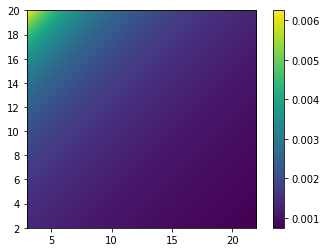

In [20]:
# %matplotlib notebook
plot_surface(Q1)

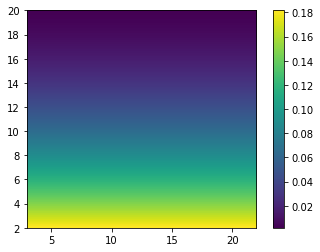

In [21]:
# %matplotlib notebook
plot_surface(Q2)

4


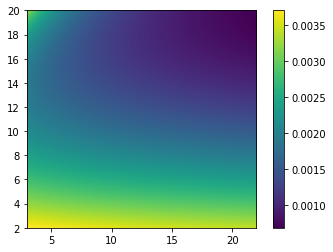

In [22]:
# %matplotlib notebook
plot_surface(Q)